<h1 align="center" style="font-variant: small-caps">Tutorial: Standard organization of a GBA model in CSV format</h1>
<h5 align="center">(<code>Version 2</code>, February 2025)</h5>

<div align="center" style="max-width:100px;display:block;margin:auto;">

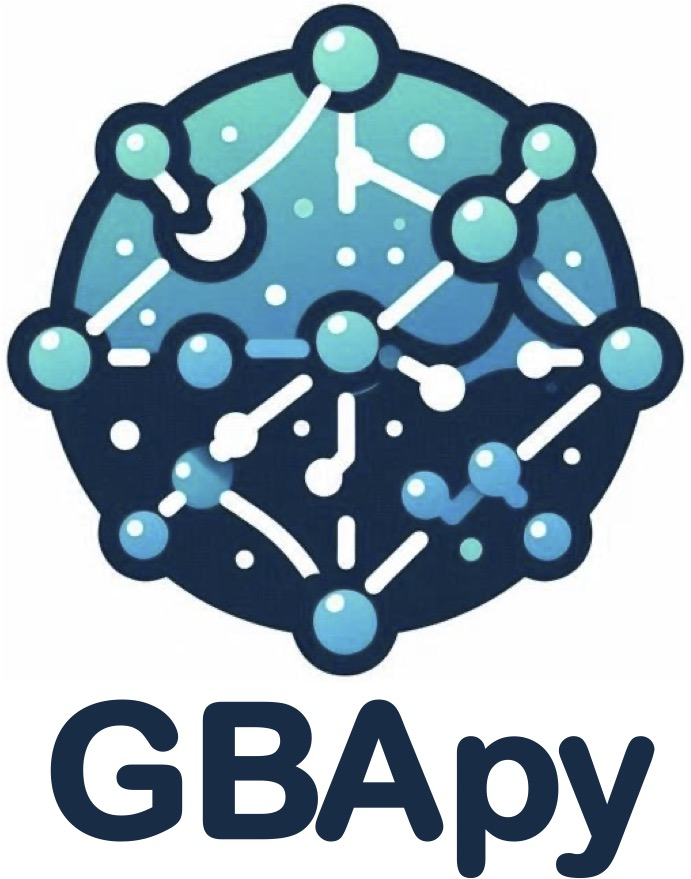

</div>

# Table of contents
* [1. Files organisation](#organisation)
* [2. Description of the minimal file set](#minimal)
  * [2.1. File `Infos.csv`](#minimal_1)
  * [2.2. File `directions.csv`](#minimal_2)
  * [2.3. File `M.csv`](#minimal_3)
  * [2.4. File `KM_forward.csv`](#minimal_4)
  * [2.5. File `kcat.csv`](#minimal_5)
  * [2.6. File `conditions.csv`](#minimal_6)
* [3. Description of optional files](#optional)
  * [3.1. File `KM_backward.csv`](#optional_1)
  * [3.2. File `KA.csv`](#optional_2)
  * [3.3. File `KI.csv`](#optional_3)
  * [3.4. File `f0.csv`](#optional_4)
  * [3.5. File `optima.csv`](#optional_5)
  * [3.6. File `random_solutions.csv`](#optional_6)
  * [3.7. File `constants.csv`](#optional_7)
  * [3.8. File `protein_contributions.csv`](#optional_8)

# 1. Files organisation <a name="organisation"></a>

The default format developed for GBA models is a set of CSV files, containing each a variable of the model. The user may refer to <a href="https://doi.org/10.1371/journal.pcbi.1011156" target="_blank">Dourado et al. (2023)</a> and this <a href="https://gba.ccb.cs.hhu.de/" target="_blank">online tutorial</a> to get the detail of the construction of a GBA model.

The minimal set of CSV files describing a model with irreversible forward Michaelis-Menten reactions is:
- `Infos.csv`: A description of the model. <strong>The variable "Name", which defines the name of the model, is mandatory</strong> (see below),
- `directions.csv`: A list of reactions' directions (`forward`, `backward`, or `reversible`),
- `M.csv`: The mass fraction matrix $\mathbf{M}$ (in g.L<sup>-1</sup>),
- `KM_forward.csv`: The matrix of Michaelis constants $K_\text{M}$ for forward reactions (in g.L<sup>-1</sup>),
- `kcat.csv`: Vectors of turnover rates $k_\text{cat}$ for forward and backward directions (in h<sup>-1</sup>),
- `conditions.csv`: The list of external conditions and total density $\rho$.

Additional files can be included depending on modeling choices:
- `KM_backward.csv`: The matrix of Michaelis constants $K_\text{M}$ for backward reactions (in g.L<sup>-1</sup>),
- `KA.csv`: The matrix of activation constants $K_\text{A}$ <strong>only</strong> (in g.L<sup>-1</sup>)<sup>*</sup>,
- `KI.csv`: The matrix of inhibition constants $K_\text{I}$ <strong>only</strong> (in g.L<sup>-1</sup>)<sup>*</sup>,
- `f0.csv`: An initial solution $f_0$ to the model (generated through the method `gba.GbaModel.solve_local_linear_problem()`),
- `optima.csv`: The list of optimal solutions $f^*$ for each condition (generated through the method `gba.GbaModel.compute_optima()`),
- `random_solutions.csv`: A list of random initial solutions (generated through the method `gba.GbaModel.generate_random_initial_solutions()`).
- `constants.csv`: A file listing reactions that should have a constant flux value,
- `protein_contributions.csv`: The list of protein contributions per reaction. This data can be used to calculate predicted proteomics, and is usually collected when a genome-scale GBA model is built using the <strong>GBApy</strong> builder.

<sup>*</sup> Note that activation and inhibition can only be used for irreversible forward reactions.

All the CSV files of a model must be included in one folder having the name of the model. <em>E.g.</em> for a model named "model":

      └── model
          ├── Infos.csv
          ├── directions.csv
          ├── M.csv
          ├── KM_forward.csv
          ├── kcat.csv
          └── conditions.csv

When calling the function `gba.read_csv_model("model")`, <strong>GBApy</strong> will parse the CSV files and automatically decide of the kinetic model (irreversible/reversible Michaelis-Menten kinetics, with or without activation or/and inhibition).

# 2. Description of the minimal file set <a name="minimal"></a>
In the following, we will use the toy model "D" (6 metabolites, 5 reactions), included in the <strong>GBApy</strong> module, and review the content of the main CSV files.
To locate the toy model, we can use the function `gba.get_toy_model_path("D")`:

In [1]:
# Import GBApy and other useful modules
import gba
import os
import pandas as pd

In [2]:
# Get toy model D path
D_path = gba.get_toy_model_path("D")
D_path

'/usr/local/lib/python3.12/site-packages/gba/data/toy_models/D'

The content of the toy model B folder is the following:

In [3]:
res = os.system("ls -l "+D_path)

total 48
-rw-r--r--  1 charlesrocabert  admin  362 Mar  4 09:18 Infos.csv
-rw-r--r--  1 charlesrocabert  admin  125 Mar  4 09:18 KM_forward.csv
-rw-r--r--  1 charlesrocabert  admin  140 Mar  4 09:18 M.csv
-rw-r--r--  1 charlesrocabert  admin  549 Mar  4 09:18 conditions.csv
-rw-r--r--  1 charlesrocabert  admin   88 Mar  4 09:18 directions.csv
-rw-r--r--  1 charlesrocabert  admin   87 Mar  4 09:18 kcat.csv


## 2.1. File `Infos.csv` <a name="infos"></a>

The file `Infos.csv` contains various information about the model (units, file description, ...).

$\Rightarrow$ <strong>Note that the variable "Name" is mandatory.</strong>

In [4]:
pd.read_csv(D_path+"/Infos.csv", sep=";")

,Name,D
0,Description,Model with redundant reactions (rxn3 and rxn4)
1,Units,Km: g/L
2,Units,kcat: 1/h ([mass of products]/[mass of protein...
3,Units,rho: g/L
4,Files,M: Mass fraction matrix
5,Files,KM_forward: Forward Michaelis constant matrix
6,Files,kcat: Turnover numbers
7,Files,conditions: Value of rho and external concentr...


## 2.2. File `directions.csv` <a name="directions"></a>

This file contains the list of directions for all reactions. Here, all the reactions are forward irreversible.

In [5]:
pd.read_csv(D_path+"/directions.csv", sep=";")

,reaction,direction
0,rxn1,forward
1,rxn2,forward
2,rxn3,forward
3,rxn4,forward
4,Ribosome,forward


## 2.3. File `M.csv` <a name="M"></a>

This file contains the mass fraction matrix (see <a href="https://doi.org/10.1371/journal.pcbi.1011156" target="_blank">Dourado et al., 2023</a>). Metabolites are in row, reactions in columns. The last row corresponds to total protein amount. The last column corresponds to the ribosome reaction, producing the total protein amount.

All metabolites starting with `x_` are external metabolites with constant concentration.

We see here that reactions `rxn1` and `rxn2` are transporters.

In [6]:
pd.read_csv(D_path+"/M.csv", sep=";")

,Unnamed: 0,rxn1,rxn2,rxn3,rxn4,Ribosome
0,x_G,-1,0,0.0,0.0,0.0
1,x_N,0,-1,0.0,0.0,0.0
2,G,1,0,-0.7,-0.8,0.0
3,N,0,1,-0.3,-0.2,-0.2
4,AA,0,0,1.0,1.0,-0.8
5,Protein,0,0,0.0,0.0,1.0


## 2.4. File `KM_forward.csv` <a name="km_forward"></a>

This file contains the matrix of forward Michaelis constants $K_\text{M}$. This file is mandatory for the minimal kinetics (<em>i.e.</em> irreversible forward Michaelis-Menten kinetics).
One can add a second matrix for backward Michaelis constants (`KM_backward.csv`) if backward or reversible reactions are present in the model.

In [7]:
pd.read_csv(D_path+"/KM_forward.csv", sep=";")

,Unnamed: 0,rxn1,rxn2,rxn3,rxn4,Ribosome
0,x_G,1,0,0,0,0.0
1,x_N,0,1,0,0,0.0
2,G,0,0,10,5,0.0
3,N,0,0,10,5,10.0
4,AA,0,0,0,0,8.3
5,Protein,0,0,0,0,0.0


## 2.5. File `kcat.csv` <a name="kcat"></a>

This file contains the vectors of forward and backward turnover rates $k_\text{cat}$. If all reactions are forward irreversible, all backward values will be zero (which is the case here).

In [8]:
pd.read_csv(D_path+"/kcat.csv", sep=";")

,Unnamed: 0,rxn1,rxn2,rxn3,rxn4,Ribosome
0,kcat_forward,30,20,20,18,4.55
1,kcat_backward,0,0,0,0,0.00


## 2.6. File `conditions.csv` <a name="conditions"></a>

This file contains the list of external conditions. Each condition contains:
- The concentration of every external metabolites,
- The total density $\rho$ (here 340 g.L<sup>-1</sup> for <em>Escherichia coli</em>).

Here, we find 25 conditions with a decaying concentration of external glucose (`x_G`).

In [9]:
pd.read_csv(D_path+"/conditions.csv", sep=";")

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,rho,340,340.000000,340.000000,340.00000,340.000000,340.000000,340.00000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.00000,340.00000
1,x_G,100,66.666667,44.444444,29.62963,19.753086,13.168724,8.77915,5.852766,3.901844,...,0.228366,0.152244,0.101496,0.067664,0.045109,0.030073,0.020049,0.013366,0.00891,0.00594
2,x_N,10,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000


# 3. Description of optional files <a name="optional"></a>

Optional files can be including in the CSV model, to improve the model or bring additional information.

## 3.1. File `KM_backward.csv` <a name="optional_1"></a>

If backward or reversible reactions are present in the model, the matrix of Michaelis constants $K_\text{M}$ for backward reactions (in g.L<sup>-1</sup>) is required. Its structure is identical to the `KM_forward.csv` file.

## 3.2. File `KA.csv` <a name="optional_2"></a>

If activator metabolites are present in the model, a matrix of activation constants $K_\text{A}$ (in g.L<sup>-1</sup>)<sup>*</sup> must be created. It is for example the case of the toy model `EC12b` (16 metabolites, 12 reactions):

In [10]:
pd.read_csv(gba.get_toy_model_path("EC12b")+"/KA.csv", sep=";")

,Unnamed: 0,tC,tP,tN,tAce,Resp,Ferm,Nucprod,Aaprod,Replication,Transcription,tRNAcharging,Ribosome
0,x_C,0,0,0,0,0,0,0,0,0,0,0,0
1,x_P,0,0,0,0,0,0,0,0,0,0,0,0
2,x_N,0,0,0,0,0,0,0,0,0,0,0,0
3,x_Ace,0,0,0,0,0,0,0,0,0,0,0,0
4,C,0,0,0,0,0,0,0,0,0,0,0,0
5,P,0,0,0,0,0,0,0,0,0,0,0,0
6,N,0,0,0,0,0,0,0,0,0,0,0,0
7,Ace,0,0,0,0,0,0,0,0,0,0,0,0
8,ADP,0,0,0,0,0,0,0,0,0,0,0,0
9,ATP,0,0,0,0,0,0,0,0,0,0,0,0


## 3.3. File `KI.csv` <a name="optional_3"></a>

If inhibitor metabolites are present in the model, a matrix of inhibition constants $K_\text{I}$ (in g.L<sup>-1</sup>)<sup>*</sup> must be created. It is for example the case of the toy model `newextended16` (13 metabolites, 8 reactions):

In [11]:
pd.read_csv(gba.get_toy_model_path("newextended16")+"/KI.csv", sep=";")

,Unnamed: 0,Carbon_met,PSII,PSI,Cyt6bf,ATPase,Rubisco,AA_s,Ribosome
0,x_C,0,0,0,0,0,0,0,0
1,x_PSU,0,0,0,0,0,0,0,85
2,CO2,0,0,0,0,0,0,0,0
3,H,0,0,0,0,0,0,0,0
4,PC,0,0,0,0,0,0,0,0
5,PC_,0,0,0,0,0,0,0,0
6,Q,0,0,0,0,0,0,0,0
7,QH2,0,0,0,0,0,0,0,0
8,ATP,0,0,0,0,0,0,0,0
9,NADPH,0,0,0,0,0,0,0,0


## 3.4. File `f0.csv` <a name="optional_4"></a>

This file contains an initial valid solution $f_0$ for the GBA model. The user can generate this solution using the method `gba.GbaModel.solve_local_linear_problem()` (see tutorial `basic_model_manipulations.ipynb`).

## 3.5. File `optima.csv` <a name="optional_5"></a>

This file contains the list of optimal $f$ vectors (<em>i.e.</em> giving the maximal growth rate), for each condition. The user can generate the set of optima using the method `gba.GbaModel.compute_optima()` (see tutorial `basic_model_manipulations.ipynb`).

## 3.6. File `random_solutions.csv` <a name="optional_6"></a>

With <strong>GBApy</strong>, it is possible to generate random initial solutions, with the method `gba.GbaModel.generate_random_initial_solutions()` (see tutorial `basic_model_manipulations.ipynb`).

## 3.7. File `constants.csv` <a name="optional_7"></a>

Depending on modeling choices or the scientific question, it might be useful to define some flux values as constant (<em>e.g.</em> water import in the cell). This can be done thanks to the file `constants.csv`. For example:

```
reaction;value
H2Ot;0.72
```

In this example, the transporter `H2Ot` will have a constant flux fraction value of 0.72.

## 3.8. File `protein_contributions.csv` <a name="optional_8"></a>

When building a genome-scale model, the molecular mass of an enzyme is calculated from its composition in proteins. Hence, each protein has a contribution weight to the total mass of the enzyme.
As GBA formalism predicts enzyme concentrations, having protein contributions to the reaction allows to estimate back the proteomics. For example, 5 proteins contribute to the composition of the enzyme in different quantities for the reaction `5FTHFPGS`. The file will contain:

```
reaction;protein;contribution
5FTHFPGS;protein_0823;1.0
5FTHFabc;protein_0641;0.36713016846161534
5FTHFabc;protein_0642;0.16678404507368044
5FTHFabc;protein_0643;0.22385598142001858
5FTHFabc;protein_0822;0.2422298050446857
```

